Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


Importing Libraries

In [ ]:
# Import libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
import pandas.util.testing as tm

Loading Dataset(AirQuality.xlsx) from Google Drive

In [ ]:
#reading the dataset file using pandas
Data = pd.read_excel('/gdrive/MyDrive/SET/AirQualityUCI.xlsx')

About Dataset

In [ ]:
Data.head()
# give 1st 5 row command name attribute and variables

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
Data.tail()
# give last 5 rows of the dataset

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


In [ ]:
Data.shape
#shows number of rows and columns in the dataset

(9357, 15)

In [ ]:
Data.describe()
# Generate descriptive statistics

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [ ]:
Data.info()
#information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

# Data Preprocessing
Pre-processing refers to the transformations applied to your data before feeding it to the Machine Learning algorithm, which affects the accuracy of final outcome. In python, scikit-learn library has a pre-built functionality under sklearn.preprocessing.Pandas library also offer such capabilities. There are many more options for pre-processing which we’ll explore.

# Dealing with missing data

In [ ]:
# Checking and counting for missing data points for each column
Data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

# Deleting missing values

In [ ]:
#Remove missing values
DataCleaned=Data.dropna()
DataCleaned.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [ ]:
# Finding out the mode value for CO(GT) column
ModeValueForColor=Data['CO(GT)'].mode()[0]
print('Mode value for CO(GT) column is: ',ModeValueForColor)

Mode value for CO(GT) column is:  -200.0


In [ ]:
# Now we can see all columns have zero missing values
print(Data.isnull().sum())
print(Data.info())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null 

In [ ]:
Data['CO(GT)'].value_counts() 
 # returns object containing counts of unique values

-200.0    1683
 1.0       305
 1.4       279
 1.6       275
 1.5       273
          ... 
 9.9         1
 7.6         1
 9.3         1
 7.0         1
 8.5         1
Name: CO(GT), Length: 97, dtype: int64

In [ ]:
Data.columns
#find columns name air quality is working as data frame

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

# Data Preprocessing

In [ ]:
Data.dtypes
#datatype of each attribute

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [ ]:
# FINDING -200 USING SIMPLE FOR LOOPS AND THEN REPLACED
l=[]
for i in range(len(Data.columns)):
    f=Data.columns[i]
    count=0
    for j in range(len(Data[f])):
        if Data[f][j]==-200:
            count+=1
    l.append((f,count))                     
print("Values from each column that needs to be replaced with avg \n ",l)      

Values from each column that needs to be replaced with avg 
  [('Date', 0), ('Time', 0), ('CO(GT)', 1683), ('PT08.S1(CO)', 366), ('NMHC(GT)', 8443), ('C6H6(GT)', 366), ('PT08.S2(NMHC)', 366), ('NOx(GT)', 1639), ('PT08.S3(NOx)', 366), ('NO2(GT)', 1642), ('PT08.S4(NO2)', 366), ('PT08.S5(O3)', 366), ('T', 366), ('RH', 366), ('AH', 366)]


In [ ]:
num=Data._get_numeric_data()
num[num<0]=0
Data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,0,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,0,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,0,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,0,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [ ]:
Data['CO(GT)'].value_counts()
# i.e all -200 are replaced with 0

0.0    1683
1.0     305
1.4     279
1.6     275
1.5     273
       ... 
9.9       1
7.6       1
9.3       1
7.0       1
8.5       1
Name: CO(GT), Length: 97, dtype: int64

0       2.6
1       2.0
2       2.2
3       2.2
4       1.6
       ... 
9352    3.1
9353    2.4
9354    2.4
9355    2.1
9356    2.2
Name: CO(GT), Length: 9357, dtype: float64


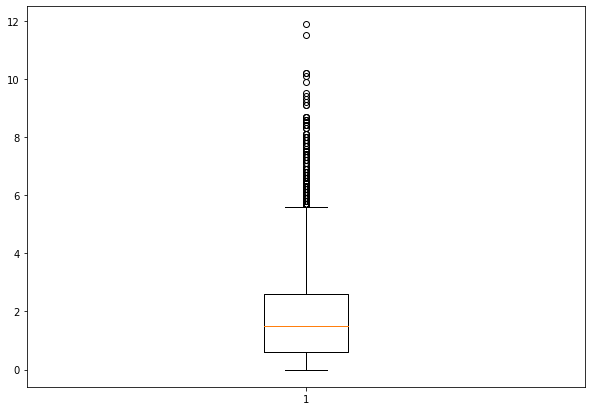

In [ ]:
# Outlier in Dataset is just -200

#Creating dataset 
np.random.seed(10) 
data =Data["CO(GT)"]
print(data)
fig = plt.figure(figsize =(10, 7)) 

# Creating plot 
plt.boxplot(data) 

# show plot 
plt.show() 

In [ ]:
# Correlation with other variables
Data.corr()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.442803,0.249731,0.670790,0.533061,0.811449,-0.513070,0.723154,0.282080,0.586753,-0.079253,-0.018418,-0.092964
PT08.S1(CO),0.442803,1.000000,0.213250,0.786143,0.922093,0.356291,-0.075630,0.284508,0.823505,0.886880,0.300359,0.417492,0.403123
NMHC(GT),0.249731,0.213250,1.000000,0.198346,0.170037,-0.003611,-0.033366,0.099541,0.196691,0.155224,-0.025205,-0.020121,-0.071580
C6H6(GT),0.670790,0.786143,0.198346,1.000000,0.926265,0.543665,-0.457762,0.402581,0.734014,0.862751,0.275852,0.074847,0.261013
PT08.S2(NMHC),0.533061,0.922093,0.170037,0.926265,1.000000,0.419047,-0.240806,0.334108,0.855763,0.903060,0.400031,0.215377,0.393508
NOx(GT),0.811449,0.356291,-0.003611,0.543665,0.419047,1.000000,-0.514602,0.795888,0.068429,0.553223,-0.268778,0.079334,-0.210622
PT08.S3(NOx),-0.513070,-0.075630,-0.033366,-0.457762,-0.240806,-0.514602,1.000000,-0.440202,-0.002102,-0.352407,0.092534,0.223613,0.068493
NO2(GT),0.723154,0.284508,0.099541,0.402581,0.334108,0.795888,-0.440202,1.000000,0.010185,0.439057,-0.195749,-0.125245,-0.324221
PT08.S4(NO2),0.282080,0.823505,0.196691,0.734014,0.855763,0.068429,-0.002102,0.010185,1.000000,0.694715,0.641916,0.291896,0.719606
PT08.S5(O3),0.586753,0.886880,0.155224,0.862751,0.903060,0.553223,-0.352407,0.439057,0.694715,1.000000,0.149302,0.318989,0.259548


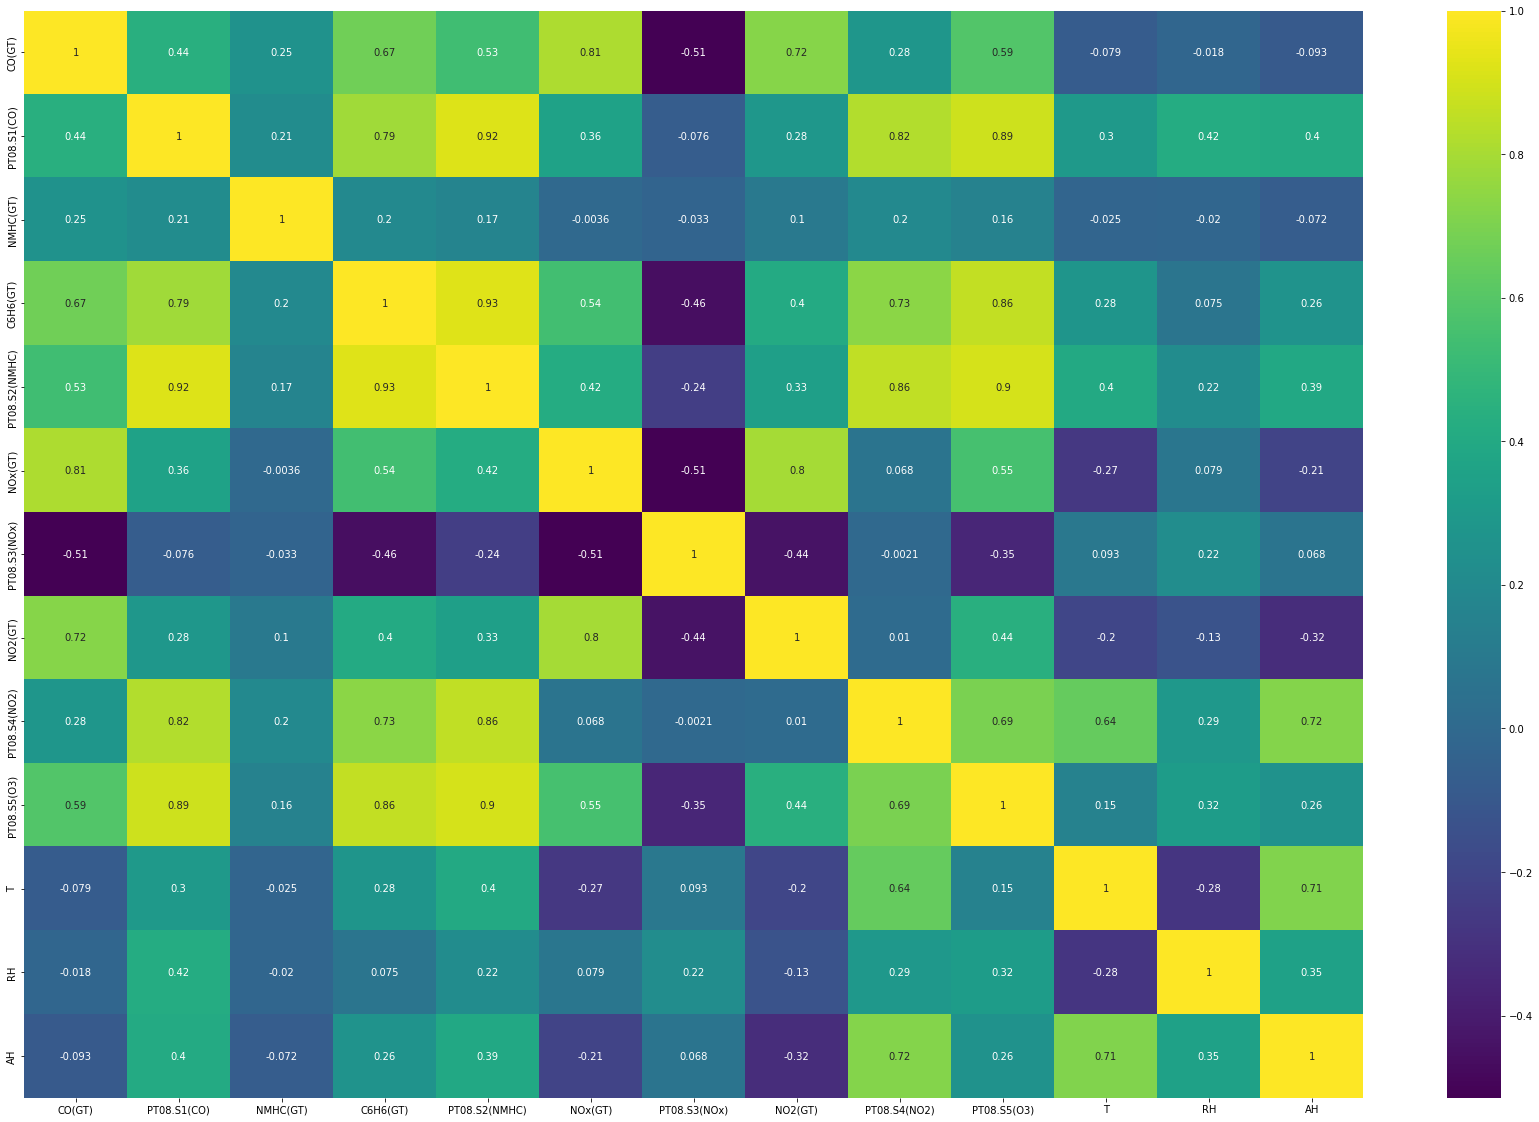

In [ ]:
corrmat=Data.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(30,20))
# to plot heat map
g=sns.heatmap(Data[top_corr_feature].corr(),annot=True,cmap='viridis')

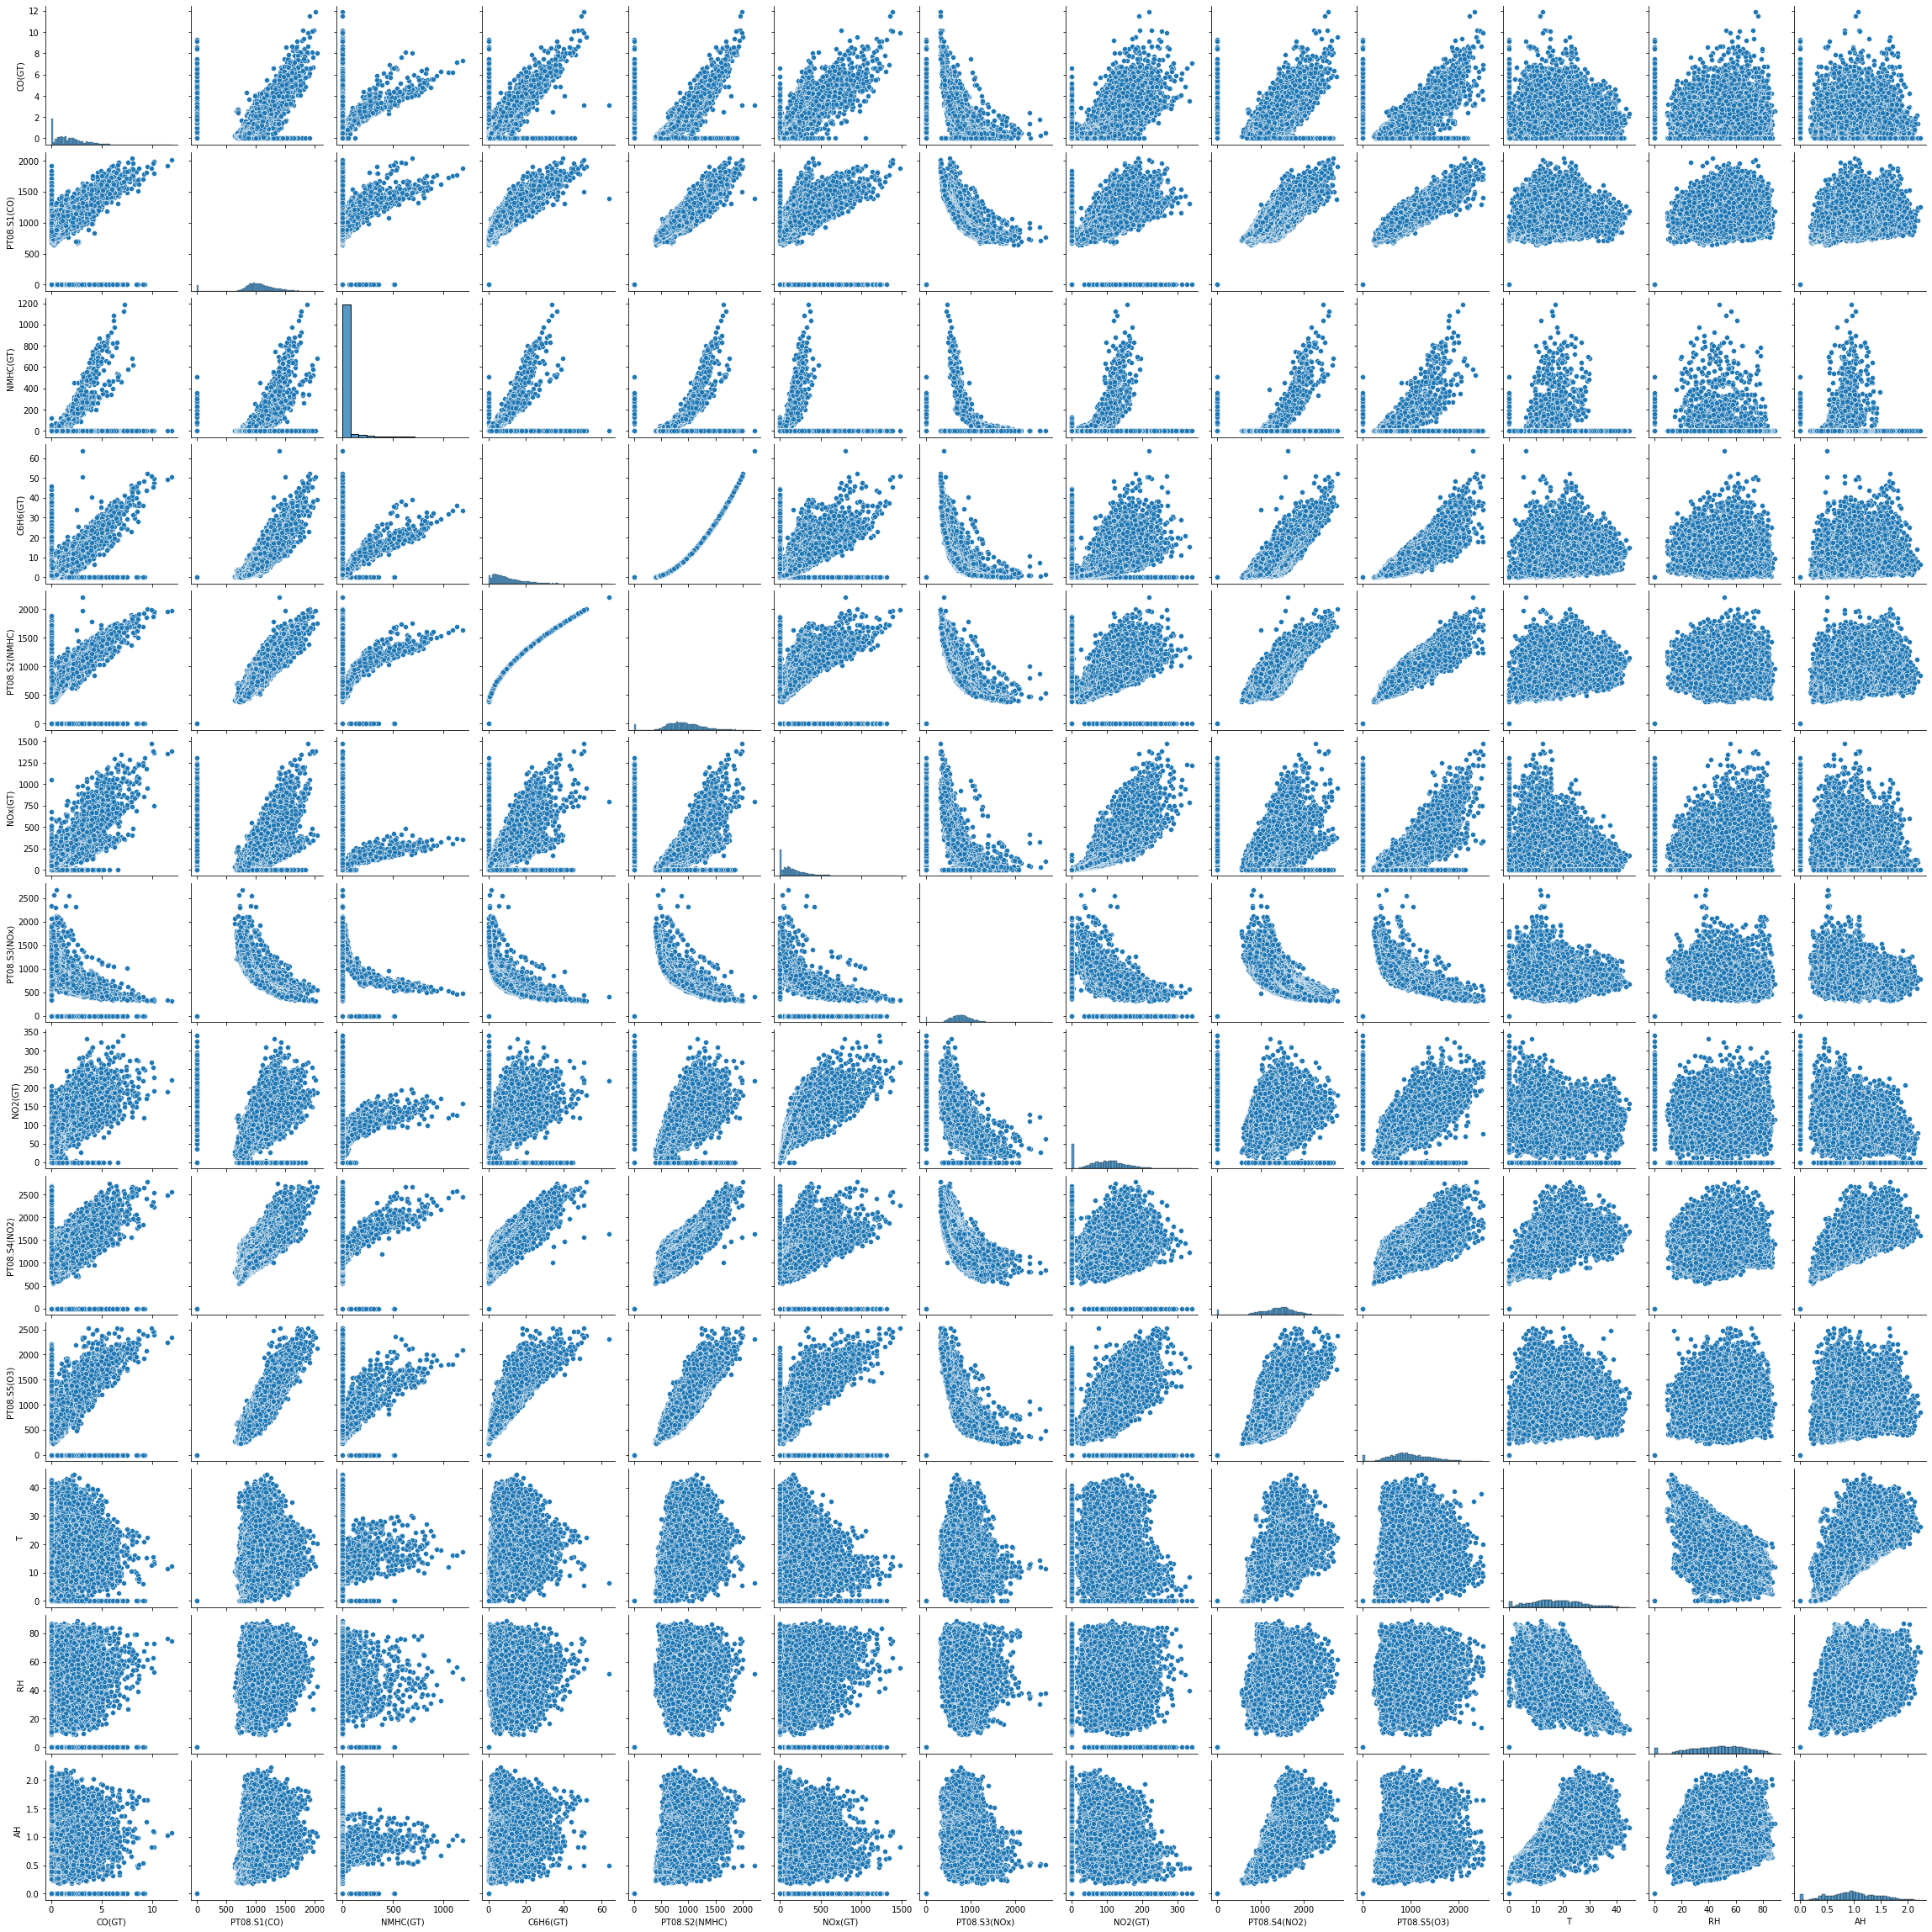

In [ ]:
sns.pairplot(Data)

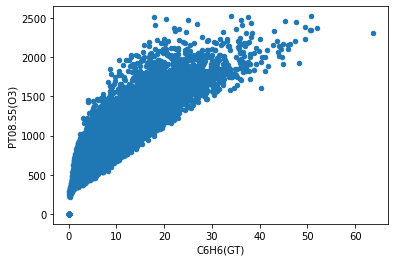

In [ ]:
Data.plot(kind='scatter',x='C6H6(GT)',y='PT08.S5(O3)')
plt.show()

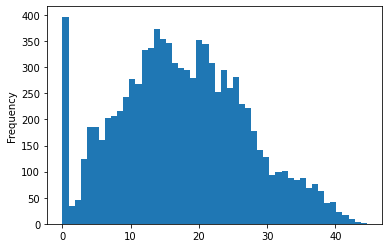

In [ ]:
Data["T"].plot.hist(bins=50)

## Conclusion
**Highest positive corrleation can be seen among T,RH -C6H6 with .97,.92 etc.**

# Prediction

In [ ]:
#features
feature=Data
feature=feature.drop('Date',axis=1)
feature=feature.drop('Time',axis=1)
feature=feature.drop('C6H6(GT)',axis=1)

In [ ]:
feature.head()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
#labels
label = Data['C6H6(GT)']

In [ ]:
label.head()

0    11.881723
1     9.397165
2     8.997817
3     9.228796
4     6.518224
Name: C6H6(GT), dtype: float64

In [ ]:
#test and train split
X_train,X_test,y_train,y_test = train_test_split(feature,label,test_size=.3)

In [ ]:
print(X_train.shape,y_train.shape)

(6549, 12) (6549,)


In [ ]:
print(X_test.shape,y_test.shape)

(2808, 12) (2808,)


In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.score(X_test,y_test)

0.9596449379820646

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([ 3.25515133, -2.18081087,  1.72019698, ..., 15.34194857,
        8.10425678, 14.59230871])

In [ ]:
# The coefficients
print('Coefficients: \n',lr.coef_)

Coefficients: 
 [ 4.65952085e-01 -4.39576539e-03  2.33650622e-04  2.11936801e-02
  5.29258323e-03 -2.88446515e-03 -1.92945612e-02  5.14467447e-03
  2.95704226e-05 -2.67887821e-01 -1.01584380e-01  1.51866143e+00]


In [ ]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

Mean squared error: 2.27


In [ ]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficient of determination: 0.96


In [ ]:
# the r squared value
print('R squared value: %.2f'%r2_score(y_test, y_pred))

R squared value: 0.96
